<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [26]:
# Load dataset (update the path if your CSV file is elsewhere
url = "/content/sample_data/DMV_Written_Tests.csv"
data = pd.read_csv(url)

# Quick checks
print("Shape of dataset:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

print("\nInfo:")
data.info()

print("\nSummary statistics:")
display(data.describe())

print("\nMissing values per column:")
print(data.isnull().sum())

Shape of dataset: (100, 3)

First 5 rows:


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB

Summary statistics:


,DMV_Test_1,DMV_Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000



Missing values per column:
DMV_Test_1    0
DMV_Test_2    0
Results       0
dtype: int64


### Task 3: Visualize the Data
---

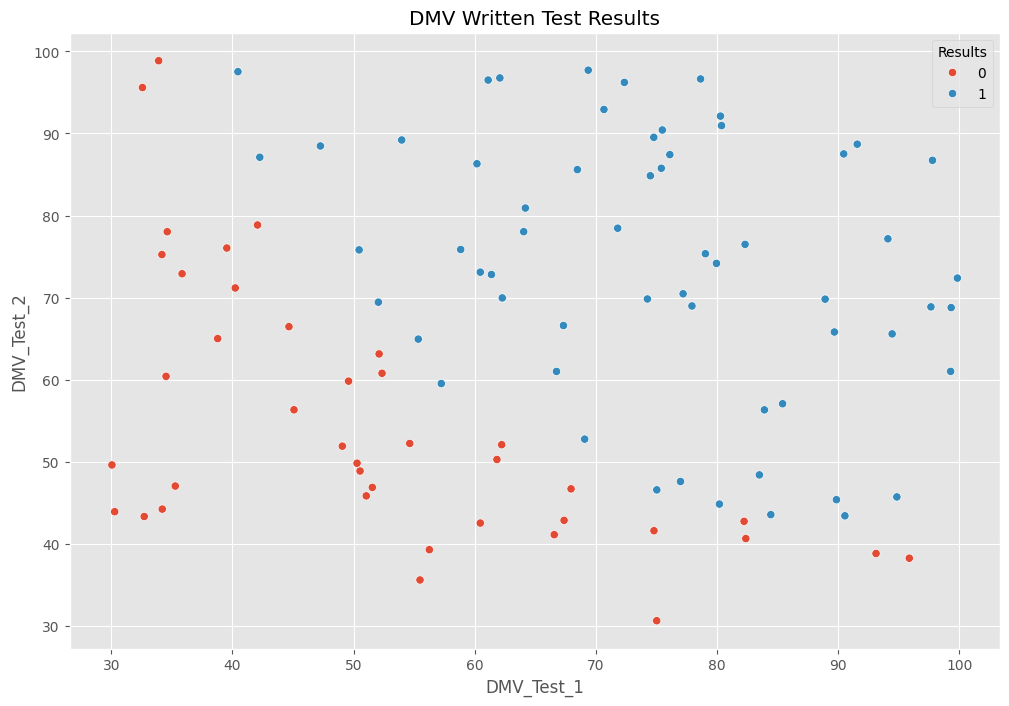

In [49]:
sns.scatterplot(data=data, x="DMV_Test_1", y="DMV_Test_2", hue="Results")
plt.title("DMV Written Test Results")
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [50]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [51]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    # Clip values to avoid log(0)
    f_wb = np.clip(f_wb, 1e-10, 1 - 1e-10)

    cost = (-1 / m) * (np.dot(y, np.log(f_wb)) + np.dot((1 - y), np.log(1 - f_wb)))
    return cost


def compute_gradient(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    error = f_wb - y
    dj_dw = (1 / m) * np.dot(X.T, error)
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db


### Task 6: Cost and Gradient at Initialization
---

In [52]:
X = data[["DMV_Test_1", "DMV_Test_2"]].values
y = data["Results"].values

w_init = np.zeros(X.shape[1])
b_init = 0

initial_cost = compute_cost(X, y, w_init, b_init)
dj_dw_init, dj_db_init = compute_gradient(X, y, w_init, b_init)

print(f"Initial Cost: {initial_cost:.4f}")
print(f"Initial dj_dw: {dj_dw_init}")
print(f"Initial dj_db: {dj_db_init:.4f}")


Initial Cost: 0.6931
Initial dj_dw: [-12.00921659 -11.26284221]
Initial dj_db: -0.1000


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [53]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w, b = w_in.copy(), b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 100 == 0:   # store cost every 100 iterations
            J_history.append(compute_cost(X, y, w, b))

    return w, b, J_history

alpha = 0.01
num_iters = 10000
w, b, J_history = gradient_descent(X, y, w_init, b_init, alpha, num_iters)

print("Optimized weights:", w)
print("Optimized bias:", b)
print("Final cost:", J_history[-1])


Optimized weights: [ 0.41024768 -0.05324509]
Optimized bias: -7.659003972169308
Final cost: 4.191553505137915


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

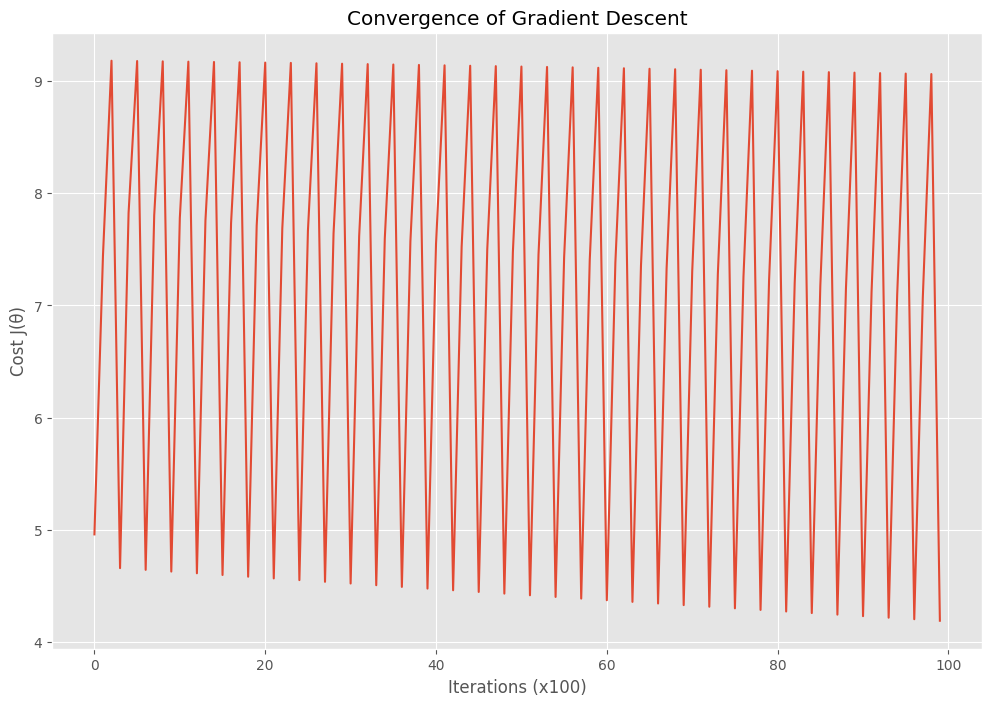

In [54]:
plt.plot(J_history)
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Gradient Descent")
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

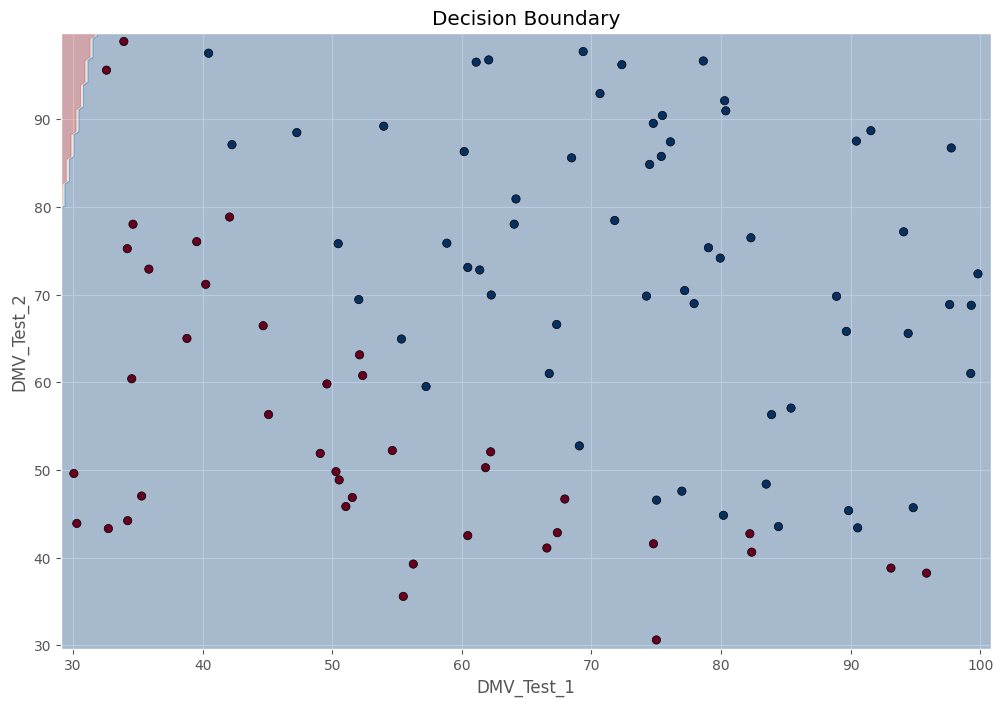

In [55]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    return (sigmoid(z) >= 0.5).astype(int)

def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = predict(grid, w, b).reshape(xx.shape)

    plt.contourf(xx, yy, probs, alpha=0.3, cmap="RdBu")
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap="RdBu")
    plt.xlabel("DMV_Test_1")
    plt.ylabel("DMV_Test_2")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, w, b)


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [56]:
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# Example test predictions
example = np.array([[45, 85], [60, 40], [90, 90]])  # sample test scores
example_pred = predict(example, w, b)
print("Predictions for examples:", example_pred)


Training Accuracy: 60.00%
Predictions for examples: [1 1 1]
